# Table Of Contents
[1. Weather Forecasting Past Present & Future](#1.Weather_Forecasting_Past_Present_&_Future)\
[2. AI as the Game changer](#2.-AI_as_the_Game_changer)\
[3. Use Cases](#3.-Use_Cases)\
[4. Applications of AI](#4.-applications_of_AI)\
[5. Use of Time Series](#5.-Use_of_Time_Series)\
[6. Giants On Weather Forecast](#6.-Giants_On_Weather_Forecast)\
[7. Instruments For Weather Forecasting](#7.-Instruments_For_Weather_Forecasting)\
[8. Conclusion](#8.-Conclusion)

### Weather Forecasting Past Present & Future

The forecasting procedure is consistent across weather types. Researchers analyze current observations using advanced technologies like radar, satellite imagery, and data from ground-based and airborne instruments to understand prevailing conditions.

In July 1949, the BBC aired its first regular television weather forecast, featuring a hand-drawn weather chart and a script from the Met Office, before the computer revolutionized weather prediction. These early forecasts were based on Jacob Bjerknes's World War One theories, which introduced weather fronts—boundaries between cold and warm air. Meteorologists used these principles to mark isobars and fronts on maps, a method still essential for short-term weather and wind predictions today.

Contemporary weather predictions rely on powerful computers. The Met Office's first operational forecast on November 2, 1965, used a machine that performed 60,000 calculations per second. In contrast, the current Cray XC40 supercomputer executes 14 quadrillion calculations per second, with a £1.2 billion successor on the way that will reach 60 quadrillion calculations per second. This increase in computational power has led to higher resolution, longer-range, and more accurate forecasts.

As weather volatility increases, it's crucial for individuals, businesses, and governments to effectively manage hazardous conditions.

What can we do? 

Recent technological advancements, particularly in AI-driven forecasting and generative AI, offer improved weather insights for business operations. AI has outperformed traditional weather forecasting in under a minute. Business leaders gain confidence in decision-making with precise forecasting tools aligned to their needs.  

### How AI can be the Game changer for weather forecasting?
AI methods, especially machine learning, and deep learning, create predictive models that enhance weather forecast accuracy by analyzing historical data such as atmospheric pressure, temperature, humidity, and wind patterns. These algorithms continuously learn from new data, improving forecast precision over time. By synthesizing millions of data points into concise insights, gives businesses a competitive edge in weather dynamics through a clear daily summary of weather events and their impacts, enabling better operational decisions. 

### Use Cases
AI-driven weather forecasting enhances operations by:

- Help, protect communities vulnerable to climate change
- Reducing delays and cancellations in aviation  
- Preventing derailments in rail transport  
- Identifying weather-impacted trucks  
- Minimizing weather-related downtime in construction  
- Preserving shooting days in film production  
- And more!


 ### Various applications of artificial intelligence in Weather Forecasting
 - 1. Predictive Modeling  
Artificial intelligence algorithms play a crucial role in predictive modeling for weather forecasting. These algorithms process extensive datasets obtained from diverse meteorological sources, including satellites, weather stations, and ocean buoys. By utilizing machine learning techniques, these systems can discern intricate patterns and trends that might not be readily apparent through conventional approaches. This advanced capability enables meteorologists to forecast weather conditions with enhanced accuracy and extended lead times
- 2. Climate Analysis 
AI enhances the assessment of long-term climate trends, improving prediction accuracy and examining climate change impacts. By analyzing decades of historical data, AI models identify changes in temperature, precipitation, and extreme weather events, providing essential insights for climate strategies, policy decisions, urban development, and resource management
- 3. Data assimilation
Meteorology integrates diverse data from satellites, radar, ground sensors, and weather stations. Artificial intelligence techniques are crucial for merging these data streams to accurately represent current atmospheric conditions.
- 4. Severe Weather Notifications  
AI systems are crucial for disseminating severe weather alert and  providing essential advance notice for preparation and response. They quickly analyze vast meteorological data to identify signs of impending severe weather events like hurricanes, tornadoes, and floods
- 5. Optimize Prediction
Enhancing weather prediction models is crucial for accurate forecasts, with AI driving this effort. By using machine learning, AI improves model efficiency and speed, analyzing historical data to identify and rectify inefficiencies.
- 6. Image Processing
Artificial intelligence plays a crucial role in processing satellite and terrestrial images for weather analysis, aiding in the identification and monitoring of storms, cloud formations, and volcanic ash. AI algorithms enhance the efficiency and accuracy of this task by autonomously analyzing meteorological features from large image datasets.
- 7. Enhancement in Rader System
The advancement of radar systems is significantly bolstered by artificial intelligence, which enhances the analysis of radar data essential for precise weather prediction and observation.
...


### Utilizing a Time Series Model for Forecasting in Python.

- Ensure that you first install the pmdarima library by executing the command pip install pmdarima.

!pip install pmdarima # Installation of pdarima

### Read our Data on the Daily Temperature of a place
- Dropping Null values if any and get the shape of the dataset 

In [1]:
import pandas as pd
df=pd.read_csv('DailyTemp.csv',index_col='DATE', parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df


Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


### Plot the Data to find Stationary or not

<Axes: xlabel='DATE'>

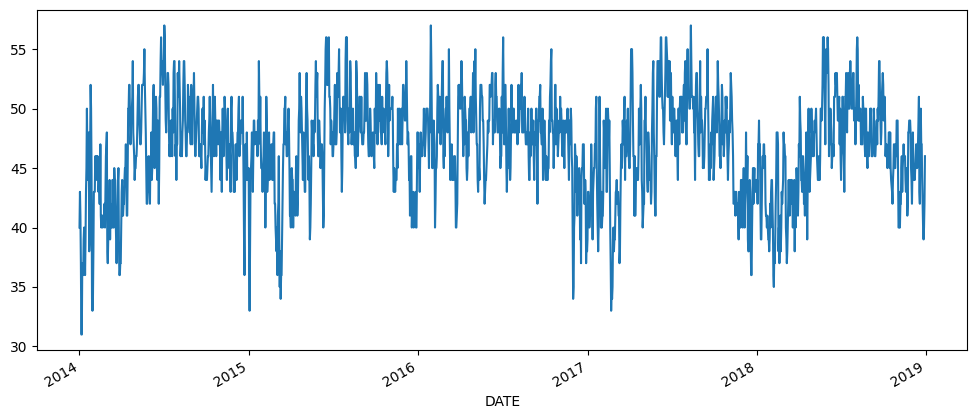

In [2]:
df['AvgTemp'].plot(figsize=(12,5))

It appears that the data exhibits a relatively stable mean of approximately 45, with fluctuations that appear to be consistent. Nevertheless, to ascertain whether the data is stationary, we will conduct a fixed statistical test utilizing the following code:

In [3]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['AvgTemp'])


1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


- To analyze the test results, it is sufficient to examine the p-value. The following straightforward approach can be employed:
- 
If p < 0.05; the data is considered stationary.-

If p > 0.05; the data is deemed non-stationary.

### Finally we will decide on the ARIMA 
- ARIMA consists of three components: Auto-Regressive, Integrated, and Moving Average.
Auto-regression refers to the method of utilizing prior values from a time series to forecast future outcomes. The number of historical values incorporated into the model dictates the order of the Auto-Regressive (AR) model. 

- Y(t) = Some_Constant * Y(t-1) + Another_Constant + Error(t).

If a data set demonstrates non-stationarity, it is generally required to implement a differencing procedure to attain stationarity.

In [5]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.705, Time=1.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=3.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.262, Time=4.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.961, Time=4.59 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=4.53 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.283, Time=4.99 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.174, Time=5.36 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.537, Time=6.63 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.538, Time=6.09 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

The ARIMA model appears to be of the order (1,0,5), exhibiting a minimum AIC score of 8295.316. With this information, we can now advance to the training and fitting of the model.

In [6]:
stepwise_fit = auto_arima(df['AvgTemp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.658
Date:                Thu, 22 Aug 2024   AIC                           8295.316
Time:                        09:53:00   BIC                           8339.373
Sample:                             0   HQIC                          8311.570
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2643      0.376      3.361      0.001       0.527       2.001
ar.L1          0.9727      0.008    119.882      0.000       0.957       0.989
ma.L1         -0.1257      0.024     -5.258      0.000      -0.172      -0.079
ma.L2         -0.2201      0.024     -9.046      0.000      -0.268      -0.172
ma.L3         -0.2035      0.024     -8.450      0.000      -0.251      -0.156
ma.L4         -0.1372      0.023     -5.987      0.000      -0.182      -0.092
ma.L5         -0.0484      0.025     -1.972      0.049      -0.097      -0.000
sigma2         5.5278      0.174     31.781      0.000       5.187       5.869
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.82
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


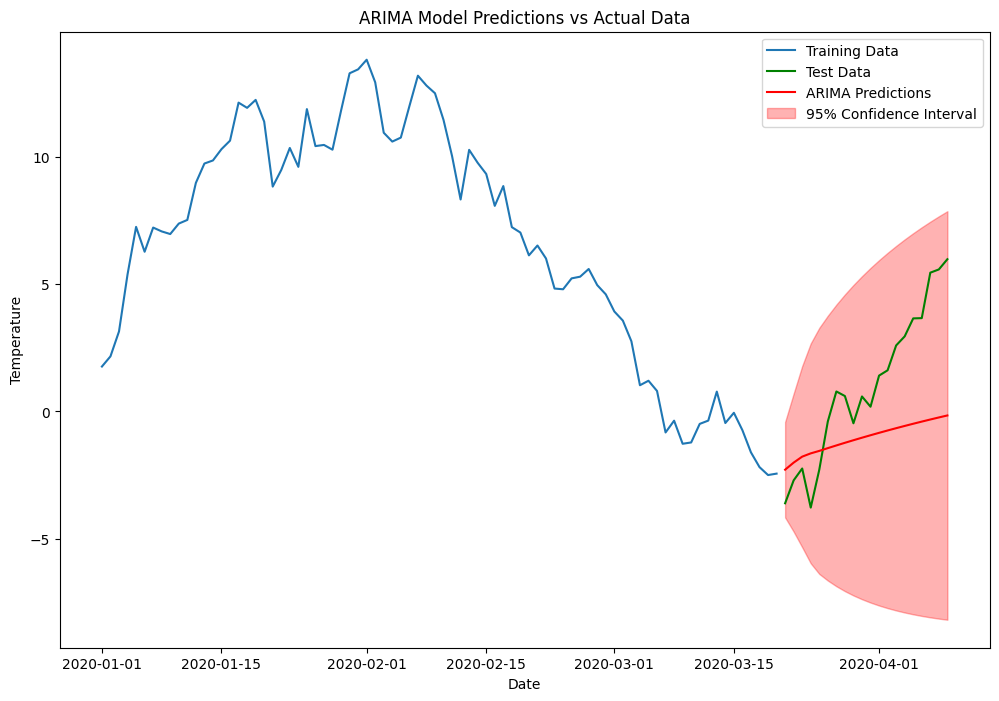

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


### ISRO - The Giant on Weather Forecasting 
Weather Forecasting is a crucial service offered by ISRO, significantly enhanced by satellite technology tailored for the Indian subcontinent. These satellites provide operational data on cloud cover, sea surface temperature, cloud motion, outgoing longwave radiation, and precipitation estimates. This data has improved forecasting accuracy through advanced weather prediction models, prompting ISRO to deploy specialized meteorological satellites.

### AccuWeather 
AccuWeather Inc. is an American media organization in the private sector that offers commercial weather forecasting services on a global scale.
- Integrate meteorological information, technological advancements, and human understanding to enhance the quality of life and business operations.
-Provide precise forecasts for every longitude and latitude coordinate across the globe.

### Instruments utilized by meteorologists for weather prediction
-1. Doppler Rader
Doppler Radar is crucial for meteorologists monitoring severe weather. The National Weather Service operates 159 radar towers across the continental U.S., with partial coverage in Alaska, Hawaii, Puerto Rico, and Guam. This technology detects precipitation, thunderstorm cloud rotation, tornado debris, and wind strength and direction.

-2. Satellite Data
Weather satellites observe Earth from space, collecting data for scientific analysis. The National Oceanic and Atmospheric Administration (NOAA) manages three types: polar-orbiting satellites, which capture six to seven high-resolution images daily from low orbits; geostationary satellites, which remain fixed above specific areas and can image the entire planet every 30 seconds; and deep space satellites, which monitor solar storms and space weather.

-3. Radiosondes 
Radiosondes are the main method for collecting upper-atmospheric data, launched twice daily from 92 U.S. sites on weather balloons. During their two-hour ascent, they transmit data on air pressure, temperature, humidity, wind speed, and direction every second. In severe weather, we increase launch frequency for additional storm information.




### Conclusion:
We are excited about the potential of machine learning in weather forecasting, fueled by innovative high-resolution data sources. These advancements can create significant value for public, military, and commercial clients, while also expanding services to underserved communities.

The question remains regarding the ability of AI models, which are trained on historical weather data, to provide highly accurate predictions as the Earth's atmosphere undergoes continuous changes and warming. Historical trends in weather forecasting indicate that advancements in technology have consistently resulted in substantial improvements in forecasting accuracy. Therefore, it may be reasonable to suggest that the future of weather prediction could be more predictable than initially thought.